In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# 2. Load Data <a class="anchor" id="Load-Data"></a>

In [2]:
# Load data using pandas
data = pd.read_csv("2016 County Election Data.xls")

# 3. Data Exploration <a class="anchor" id="Data-Exploration"></a>

In [3]:
# View column names
data.columns

Index(['County', 'Population', 'Population-growth', 'Population-density',
       'Income-per-capita', 'Percent-white', 'Percent-in-poverty',
       'Bachelors-degree-or-higher', 'Clinton-lead'],
      dtype='object')

In [4]:
# Dataframe shape
data.shape

(3020, 9)

In [5]:
# Take a glimpse of the data
data.head(15)

,County,Population,Population-growth,Population-density,Income-per-capita,Percent-white,Percent-in-poverty,Bachelors-degree-or-higher,Clinton-lead
0,"Autauga, alabama",55395,1.5,91.8,24571,75.9,12.1,20.9,-49.48
1,"Baldwin, alabama",200111,9.8,114.6,26766,83.1,13.9,27.7,-57.79
2,"Barbour, alabama",26887,-2.1,31.0,16829,46.3,26.7,13.4,-5.61
3,"Bibb, alabama",22506,-1.8,36.8,17427,74.6,18.1,12.1,-55.54
4,"Blount, alabama",57719,0.7,88.9,20730,87.8,15.8,12.1,-81.38
5,"Bullock, alabama",10764,-1.4,17.5,18628,22.2,21.6,12.5,50.86
6,"Butler, alabama",20296,-3.1,27.0,17403,53.5,28.4,14.0,-13.53
7,"Calhoun, alabama",115916,-2.3,195.7,20828,73.1,21.9,16.1,-41.38
8,"Chambers, alabama",34076,-0.3,57.4,19291,57.4,24.1,11.8,-14.81
9,"Cherokee, alabama",26037,0.2,46.9,22030,91.8,21.2,12.8,-69.36


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   County                      3020 non-null   object 
 1   Population                  3020 non-null   int64  
 2   Population-growth           3020 non-null   float64
 3   Population-density          3020 non-null   float64
 4   Income-per-capita           3020 non-null   int64  
 5   Percent-white               3020 non-null   float64
 6   Percent-in-poverty          3020 non-null   float64
 7   Bachelors-degree-or-higher  3020 non-null   float64
 8   Clinton-lead                3020 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 212.5+ KB


In [7]:
data.describe()

,Population,Population-growth,Population-density,Income-per-capita,Percent-white,Percent-in-poverty,Bachelors-degree-or-higher,Clinton-lead
count,3.020000e+03,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000
mean,1.011997e+05,0.470265,257.729934,23564.644702,77.343444,16.729603,19.775927,-31.927801
std,3.303392e+05,4.239628,1748.182131,5565.655477,19.642285,6.505702,8.837720,30.987109
min,8.600000e+01,-17.000000,0.100000,8948.000000,3.200000,0.900000,3.200000,-91.640000
25%,1.089550e+04,-2.000000,16.900000,19856.500000,65.800000,12.100000,13.700000,-55.012500
50%,2.531700e+04,-0.200000,43.900000,22902.000000,84.600000,16.000000,17.600000,-38.225000
75%,6.625575e+04,2.225000,110.625000,26205.000000,93.300000,20.400000,23.400000,-14.632500
max,1.011670e+07,72.900000,69467.500000,62498.000000,98.900000,48.000000,74.400000,80.990000


In [8]:
# Distribution of results
print('Trump Won Counties: ', len(data.loc[data['Clinton-lead'] < 0]), ', Mean Trump County Pop.: ', round(data.loc[data['Clinton-lead'] < 0]['Population'].mean(), 1))
print('Clinton Won Counties: ', len(data.loc[data['Clinton-lead'] > 0]), ', Mean Clinton County Pop.: ', round(data.loc[data['Clinton-lead'] > 0]['Population'].mean(), 1))


Trump Won Counties:  2542 , Mean Trump County Pop.:  53922.6
Clinton Won Counties:  478 , Mean Clinton County Pop.:  352619.3


In [9]:
# Put the election results into bins
data['Results_binned'] = pd.cut(data['Clinton-lead'], bins= np.linspace(-100, 100, num = 7))
data.head(15)

,County,Population,Population-growth,Population-density,Income-per-capita,Percent-white,Percent-in-poverty,Bachelors-degree-or-higher,Clinton-lead,Results_binned
0,"Autauga, alabama",55395,1.5,91.8,24571,75.9,12.1,20.9,-49.48,"(-66.667, -33.333]"
1,"Baldwin, alabama",200111,9.8,114.6,26766,83.1,13.9,27.7,-57.79,"(-66.667, -33.333]"
2,"Barbour, alabama",26887,-2.1,31.0,16829,46.3,26.7,13.4,-5.61,"(-33.333, 0.0]"
3,"Bibb, alabama",22506,-1.8,36.8,17427,74.6,18.1,12.1,-55.54,"(-66.667, -33.333]"
4,"Blount, alabama",57719,0.7,88.9,20730,87.8,15.8,12.1,-81.38,"(-100.0, -66.667]"
5,"Bullock, alabama",10764,-1.4,17.5,18628,22.2,21.6,12.5,50.86,"(33.333, 66.667]"
6,"Butler, alabama",20296,-3.1,27.0,17403,53.5,28.4,14.0,-13.53,"(-33.333, 0.0]"
7,"Calhoun, alabama",115916,-2.3,195.7,20828,73.1,21.9,16.1,-41.38,"(-66.667, -33.333]"
8,"Chambers, alabama",34076,-0.3,57.4,19291,57.4,24.1,11.8,-14.81,"(-33.333, 0.0]"
9,"Cherokee, alabama",26037,0.2,46.9,22030,91.8,21.2,12.8,-69.36,"(-100.0, -66.667]"


In [10]:
# Group by the bin and review averages
data.groupby('Results_binned').mean()

,Population,Population-growth,Population-density,Income-per-capita,Percent-white,Percent-in-poverty,Bachelors-degree-or-higher,Clinton-lead
Results_binned,,,,,,,,
"(-100.0, -66.667]",13053.148789,-0.013495,21.715917,23284.259516,86.593080,15.495156,16.576125,-73.250484
"(-66.667, -33.333]",34625.016370,0.106335,64.988256,22437.301779,84.012954,16.362135,16.787900,-49.931673
"(-33.333, 0.0]",99823.954009,0.578774,167.521816,24236.061321,75.644340,16.376179,21.222877,-19.099741
"(0.0, 33.333]",301910.827586,1.584770,549.509195,25684.077586,60.621264,18.093966,27.154023,13.764253
"(33.333, 66.667]",475344.754237,1.862712,1690.846610,26330.677966,41.969492,21.809322,30.071186,45.975932
"(66.667, 100.0]",616363.000000,1.050000,12329.366667,26200.666667,26.550000,24.941667,29.233333,73.574167


In [11]:
data.corr()['Clinton-lead'].sort_values()

Percent-white                -0.560320
Population-growth             0.126156
Percent-in-poverty            0.165681
Income-per-capita             0.216247
Population-density            0.262241
Population                    0.344844
Bachelors-degree-or-higher    0.459850
Clinton-lead                  1.000000
Name: Clinton-lead, dtype: float64

In [10]:
data.corr()['Clinton-lead'].abs().sort_values(ascending = False)

Clinton-lead                  1.000000
Percent-white                 0.560320
Bachelors-degree-or-higher    0.459850
Population                    0.344844
Population-density            0.262241
Income-per-capita             0.216247
Percent-in-poverty            0.165681
Population-growth             0.126156
Name: Clinton-lead, dtype: float64

Here, we can see that the percentage white and bachlors-degree or higher have the strongest correlation with the percentage of vote the candidates received.

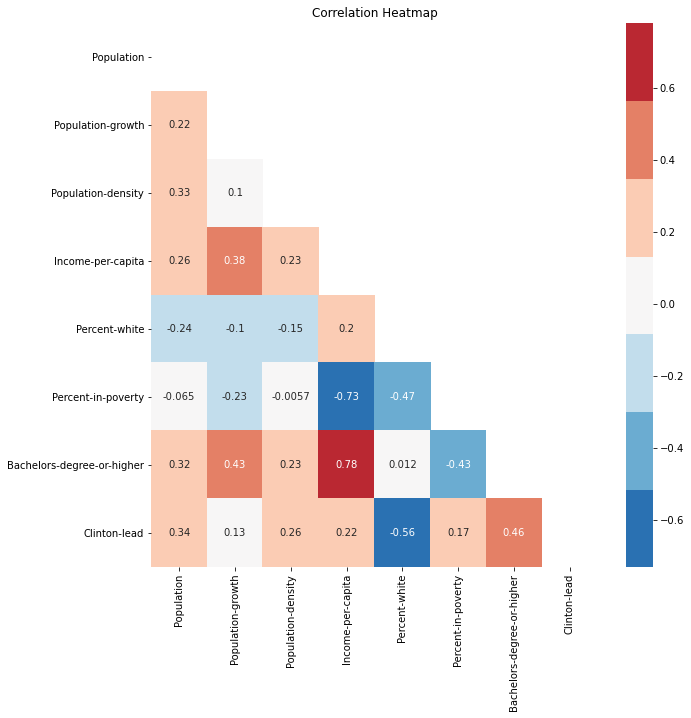

In [11]:
# Correlation Heatmap
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
#heatmap = sns.heatmap(data.corr(), mask=mask, cmap=plt.cm.RdBu_r, annot=True)
heatmap = sns.heatmap(data.corr(), mask=mask, cmap=sns.color_palette("RdBu_r", 7), annot=True)
heatmap.set_title('Correlation Heatmap')
plt.show()

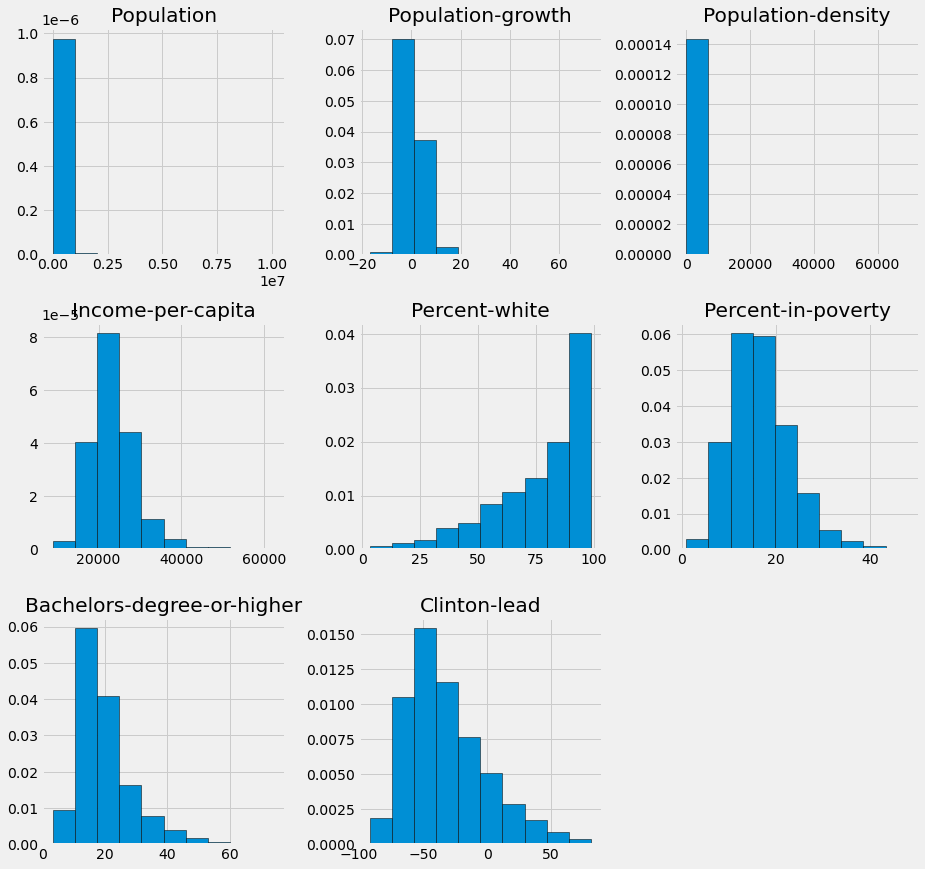

In [12]:
# Create histograms for each data column
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (14,14)
data.hist(density=True, edgecolor='k');

In [13]:
# use the column that contains Clinton's margin of victory to create a column for our labels (Trump or Clinton victory)
data.loc[data["Clinton-lead"] > 0, "Label"] = "CLINTON"
data.loc[data["Clinton-lead"] <  0, "Label"] = "TRUMP"

# we no longer need the binned results column and can drop it
data.drop(["Results_binned"], axis=1, inplace=True)

# 4. Model Creation 

In [15]:
# Simple functions we can reuse to return a trained random forest model and to split our data into training and testing datasets
def trained_model(X, y):
    model = RandomForestClassifier(random_state=7)
    model.fit(X, y)
    return model

def split_data(X, y, test_size=.2):
  # Split the data into training and test sets
  return train_test_split(X, y, test_size=test_size, random_state=5)

In [16]:
y = data['Label'].values
# Create a dataframe with the county features (X values). We exclude the county name, Clinton-lead, and Label columns.
features = data[data.columns[1:-2]]   # dataset

In [17]:
# Train the model using only the features that are in the original data
X_train, X_test, y_train, y_test = split_data(features, y)
model_original_feat = trained_model(X_train, y_train)
print('Accuracy score using original features only: ', round(model_original_feat.score(X_test, y_test) * 100, 2))
print('ROC AUC score using original features: ', round(roc_auc_score(y_test, model_original_feat.predict_proba(X_test)[:, 1]) * 100, 2))

Accuracy score using original features only:  92.22
ROC AUC score using original features:  96.44


# 5. Feature Engineering 

In [18]:
# Create the polynomial object and fit using the original features
poly_transformer = PolynomialFeatures(degree=3, include_bias=False)
poly_transformer.fit(features)
poly_features = poly_transformer.transform(features)
feature_names = poly_transformer.get_feature_names(input_features=features.columns)
poly_features.shape

(3020, 119)

In [19]:
X_train, X_test, y_train, y_test = split_data(poly_features, y)
model_poly_feat = trained_model(X_train, y_train)
print('Score using polynomial features: ', round(model_poly_feat.score(X_test, y_test) * 100, 2))
print('ROC AUC score using polynomial features: ', round(roc_auc_score(y_test, model_poly_feat.predict_proba(X_test)[:, 1]) * 100, 2))

Score using polynomial features:  92.55
ROC AUC score using polynomial features:  96.62


In [20]:
scaler = MinMaxScaler()

X = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = split_data(X, y)
model_scaled_feat = trained_model(X_train, y_train)
print('Score using MinMaxScaler on original features: ', round(model_scaled_feat.score(X_test, y_test) * 100, 2))
print('ROC AUC score using MinMaxScaler original features: ', round(roc_auc_score(y_test, model_scaled_feat.predict_proba(X_test)[:, 1]) * 100, 2))

Score using MinMaxScaler on original features:  92.38
ROC AUC score using MinMaxScaler original features:  96.4


# 6. Predict County Results <a class="anchor" id="Predict-County-Results"></a>

In [21]:
def predict_winner(county, model):
    X = data[data['County'] == county][data.columns[1:-2]]
    y = data[data['County'] == county]['Clinton-lead'].values[0]
    prediction  = model.predict(X)[0]
    print(county)
    print("Predicted Winner: {0}\nClinton margin of victory: {1}\n".format(prediction, y))

In [22]:
# Select 15 random counties
random_counties = data.sample(n=20)
random_counties

,County,Population,Population-growth,Population-density,Income-per-capita,Percent-white,Percent-in-poverty,Bachelors-degree-or-higher,Clinton-lead,Label
2280,"Lawrence, south-dakota",24657,2.3,30.1,27498,90.8,14.4,29.1,-34.24,TRUMP
2327,"Dickson, tennessee",50575,1.9,101.4,21547,90.2,15.4,14.2,-45.63,TRUMP
2316,"Cheatham, tennessee",39764,1.7,129.3,23459,93.8,13.8,18.9,-46.88,TRUMP
61,"Tallapoosa, alabama",41165,-1.1,58.1,21434,69.0,19.8,16.3,-41.59,TRUMP
2988,"Vilas, wisconsin",21398,-0.1,25.0,26252,86.0,13.3,24.1,-25.27,TRUMP
2557,"Mason, texas",4071,1.5,4.3,27504,75.1,13.6,26.5,-63.47,TRUMP
2923,"Wood, west-virginia",86237,-0.8,237.4,24042,95.6,16.2,18.4,-47.77,TRUMP
677,"Clinton, indiana",32776,-1.3,82.0,21554,83.9,13.9,13.0,-48.01,TRUMP
164,"Del Norte, california",27212,-4.9,28.4,19072,63.1,21.8,14.0,-17.62,TRUMP
208,"Tehama, california",63067,-0.6,21.5,20439,70.2,19.7,13.5,-36.77,TRUMP


In [52]:
# Predict the election winner for each county in the counties list
for county in random_counties['County']:
  predict_winner(county, model_original_feat)

Doniphan, kansas
Predicted Winner: TRUMP
Clinton margin of victory: -59.92

Accomack, virginia
Predicted Winner: TRUMP
Clinton margin of victory: -11.71

Smyth, virginia
Predicted Winner: TRUMP
Clinton margin of victory: -55.25

Iron, utah
Predicted Winner: TRUMP
Clinton margin of victory: -51.59

St. Tammany Parish, louisiana
Predicted Winner: TRUMP
Clinton margin of victory: -50.81

Rice, minnesota
Predicted Winner: TRUMP
Clinton margin of victory: -3.08

Tazewell, virginia
Predicted Winner: TRUMP
Clinton margin of victory: -66.32

McIntosh, oklahoma
Predicted Winner: TRUMP
Clinton margin of victory: -42.46

Latah, idaho
Predicted Winner: CLINTON
Clinton margin of victory: 4.62

Putnam, west-virginia
Predicted Winner: TRUMP
Clinton margin of victory: -47.75

Shasta, california
Predicted Winner: TRUMP
Clinton margin of victory: -37.37

Paulding, georgia
Predicted Winner: TRUMP
Clinton margin of victory: -41.24

Yuba, california
Predicted Winner: TRUMP
Clinton margin of victory: -24.12